## Safety

I will be counting the number of police arrests in each neighborhood, and concluding which one would be the safest.

In [1]:
import pandas as pd

In [2]:
arrest = pd.read_csv("arrests.csv")

In [3]:
arrest.head()

,_id,PK,CCR,AGE,GENDER,RACE,ARRESTTIME,ARRESTLOCATION,OFFENSES,INCIDENTLOCATION,INCIDENTNEIGHBORHOOD,INCIDENTZONE,INCIDENTTRACT,COUNCIL_DISTRICT,PUBLIC_WORKS_DIVISION,X,Y
0,1,1975272,16158872,42.0,F,B,2016-08-24T12:20:00,"4700 Block Centre AV Pittsburgh, PA 15213",3929 Retail Theft.,"4700 Block Centre AV Pittsburgh, PA 15213",Bloomfield,5,804.0,8.0,2.0,-79.949277,40.452551
1,2,1974456,16144120,31.0,M,W,2016-08-03T14:55:00,"4200 Block Steubenville PKE Pittsburgh, PA 15205",13(a)(16) Possession of Controlled Substance,"4200 Block Steubenville PKE Pittsburgh, PA 15205",Outside City,OSC,5599.0,NaN,NaN,-80.088018,40.440136
2,3,1974466,16144165,63.0,F,B,2016-08-03T16:45:00,"900 Block Freeport RD Fox Chapel, PA 15238",3929 Retail Theft.,"900 Block Freeport RD Fox Chapel, PA 15238",Westwood,5,2811.0,9.0,2.0,-79.891803,40.486625
3,4,1974550,16145257,25.0,F,W,2016-08-05T02:36:00,"Foreland ST & Cedar AV Pittsburgh, PA 15212",5503 Disorderly Conduct. / 5505 Public Drunken...,"Foreland ST & Cedar AV Pittsburgh, PA 15212",East Allegheny,1,2304.0,1.0,1.0,-80.001939,40.454080
4,5,1974596,16145962,25.0,M,B,2016-08-06T02:00:00,"900 Block Woodlow ST Pittsburgh, PA 15205",2702 Aggravated Assault. / 2705 Recklessy Enda...,"900 Block Woodlow ST Pittsburgh, PA 15205",Crafton Heights,5,2814.0,2.0,5.0,-80.052204,40.445900


In [4]:
arrest.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 64852 entries, 0 to 64851
Data columns (total 17 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   _id                    64852 non-null  int64  
 1   PK                     64852 non-null  int64  
 2   CCR                    64852 non-null  int64  
 3   AGE                    64452 non-null  float64
 4   GENDER                 64852 non-null  object 
 5   RACE                   64852 non-null  object 
 6   ARRESTTIME             64852 non-null  object 
 7   ARRESTLOCATION         64852 non-null  object 
 8   OFFENSES               64849 non-null  object 
 9   INCIDENTLOCATION       64852 non-null  object 
 10  INCIDENTNEIGHBORHOOD   62418 non-null  object 
 11  INCIDENTZONE           64753 non-null  object 
 12  INCIDENTTRACT          62441 non-null  float64
 13  COUNCIL_DISTRICT       54923 non-null  float64
 14  PUBLIC_WORKS_DIVISION  54923 non-null  float64
 15  X 

**Used arrest.info to get and select the necessary info that I will be using for my code**

In [14]:
ndict = dict()

for index, row in arrest.iterrows():
    place = row["INCIDENTNEIGHBORHOOD"]
    if place in ndict:
        ndict[place] += 1
    else:
        ndict[place] = 1
ndict

{'Bloomfield': 968,
 'Outside City': 309,
 'Westwood': 222,
 'East Allegheny': 2153,
 'Crafton Heights': 585,
 'Greenfield': 531,
 'Brookline': 1346,
 'Regent Square': 36,
 'East Liberty': 1848,
 nan: 2434,
 'East Hills': 1158,
 'Carrick': 2297,
 'Allegheny Center': 1227,
 'South Side Flats': 3377,
 'Sheraden': 1255,
 'East Carnegie': 48,
 'Golden Triangle/Civic Arena': 83,
 'Point Breeze North': 277,
 'Perry South': 1038,
 'Allentown': 930,
 'North Shore': 791,
 'Marshall-Shadeland': 1489,
 'Central Oakland': 511,
 'Middle Hill': 919,
 'Strip District': 492,
 'Lincoln-Lemington-Belmar': 1318,
 'Central Northside': 23,
 'Troy Hill-Herrs Island': 6,
 'Highland Park': 548,
 'Homewood North': 1931,
 'Northview Heights': 696,
 'Brighton Heights': 1093,
 'Hazelwood': 1364,
 'Perry North': 585,
 'Bedford Dwellings': 653,
 'Elliott': 650,
 'Beechview': 1166,
 'Fineview': 789,
 'Glen Hazel': 164,
 'Spring Hill-City View': 702,
 'Bluff': 1458,
 'Manchester': 458,
 'Homewood West': 752,
 'Outsid

**Created a dictionary to collect the neighboorhood and count the number of arrests in each**

In [6]:
df = pd.DataFrame.from_dict(ndict, orient = 'index', columns =['number_arrests'])
df

,number_arrests
Bloomfield,968
Outside City,309
Westwood,222
East Allegheny,2153
Crafton Heights,585
...,...
Ridgemont,37
Swisshelm Park,42
Hays,117
Chartiers City,44


**Created a new data frame using the dictionary**

In [7]:
df.sort_values(by = 'number_arrests', ascending = False).head(10)

,number_arrests
Central Business District,4238
South Side Flats,3377
NaN,2434
Carrick,2297
East Allegheny,2153
Homewood South,2044
Homewood North,1931
East Liberty,1848
Marshall-Shadeland,1489
Bluff,1458


**Sorted the data frame to display the top 10 neighborhoods with most arrests**

In [8]:
df.sort_values(by = 'number_arrests', ascending = True).head(10)

,number_arrests
Mt. Oliver Neighborhood,2
Troy Hill-Herrs Island,6
Mt. Oliver Boro,18
Central Northside,23
Regent Square,36
Ridgemont,37
New Homestead,39
Swisshelm Park,42
Chartiers City,44
East Carnegie,48


**Sorted the data frame to display the top 10 neighborhoods with least number of arrests**

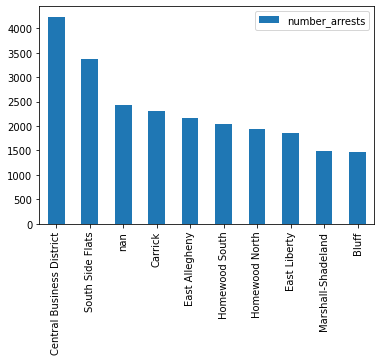

In [9]:
df.sort_values(by = 'number_arrests', ascending = False).head(10).plot(kind="bar")

**Used a bar graph to display the top 10 neighborhoods with the most arrests**

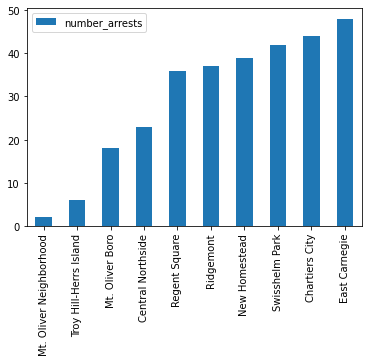

In [10]:
df.sort_values(by = 'number_arrests', ascending = True).head(10).plot(kind="bar")

**Used a bar graph to display the top 10 neighborhoods with the most arrests**

## Conclusion

Utilizing the new data frame created through the dictionary and analysing the bar graphs, Central Business District is the neighborhood where the most arrests happen, and Mr. Oliver Neighborhood where the least number of arrests happen, resulting in being the safest neighborhood in terms of police arrests in each neighborhood.